In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prm_data_path = '../data storage/prm_data_L16_FCNN_Nh3.pth'

In [3]:
prm = torch.load('../data storage/prm_data_L16_FCNN_Nh3.pth')
prm

OrderedDict([('fc1.weight',
              tensor([[ 1.2119e-02,  3.5719e-02,  4.0563e-03,  1.2020e-01, -2.7457e-02,
                       -3.0364e-01,  2.2592e-02,  1.2475e-01,  8.8953e-02, -1.3229e-01,
                        7.4583e-02,  1.2412e-01,  4.3140e-02,  4.9495e-02,  9.6837e-02,
                        9.8910e-03, -1.0866e-01,  3.7378e-03, -2.9292e-02,  4.7113e-02,
                        3.5467e-02,  8.2529e-02, -7.3852e-03, -1.7324e-02,  3.7718e-02,
                        1.3111e-01,  1.6125e-01, -1.0256e-01,  4.0667e-02, -2.3409e-02,
                        2.4113e-02, -2.3131e-02, -1.1397e-01,  1.2827e-01,  7.7946e-03,
                        1.5101e-01,  8.6819e-02,  6.2193e-02,  1.8527e-01,  1.0845e-01,
                       -3.2922e-02,  1.1330e-01,  1.2355e-01, -9.5817e-02,  6.4054e-02,
                        4.9663e-02,  1.9846e-01,  4.6412e-02, -2.0122e-02,  5.6177e-02,
                        9.5288e-03,  1.1928e-01,  1.0344e-01,  8.0059e-03, -1.3294e-02,
    

In [4]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[-1.2428e+01, -1.2814e+01,  1.4028e+00],
        [-1.2691e+01, -1.3904e+01,  1.4534e+00],
        [-1.2133e+01, -1.3007e+01,  2.1959e+00],
        [-1.1100e+01, -1.0691e+01,  1.3968e+00],
        [-1.0128e+01, -1.0402e+01,  1.4998e+00],
        [-6.9706e+00, -8.9391e+00,  6.5430e-01],
        [-6.2674e+00, -6.7976e+00, -1.4645e+00],
        [-2.7255e-01, -1.1167e+00,  7.9408e-01],
        [ 1.6367e-01,  1.0586e+00, -2.8186e+00],
        [ 6.2592e-01,  3.2922e-01, -7.8482e+00],
        [ 8.2792e-01,  3.5888e-01, -1.1004e+01],
        [ 8.7432e-02,  7.6558e-01, -1.3522e+01],
        [ 7.2233e-02,  1.4575e+00, -1.3822e+01],
        [-5.9570e-01,  2.0644e+00, -1.4581e+01],
        [ 1.7760e+00,  6.1643e-02, -1.5311e+01],
        [ 9.8613e-01, -2.3701e-01, -1.5932e+01],
        [ 1.5550e+00,  2.2001e-01, -1.5856e+01],
        [ 4.4741e-01,  1.3691e+00, -1.6168e+01],
        [ 1.5738e+00,  1.0133e+00, -1.6804e+01],
        [ 1.0302e+00, -7.5379e-03, -1.6765e+01]])

In [5]:
fc2_weight.size()

torch.Size([20, 3])

In [6]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [7]:
fc2_weight_np_square

array([[-1.2427735e+01, -1.2690982e+01, -1.2133210e+01, -1.1100401e+01,
        -1.0127844e+01, -6.9706464e+00, -6.2674460e+00, -2.7255371e-01,
         1.6366945e-01,  6.2592411e-01,  8.2792115e-01,  8.7432466e-02,
         7.2232977e-02, -5.9570211e-01,  1.7759923e+00,  9.8613173e-01,
         1.5550004e+00,  4.4740933e-01,  1.5737681e+00,  1.0301698e+00],
       [-1.2814374e+01, -1.3903774e+01, -1.3007115e+01, -1.0691081e+01,
        -1.0402456e+01, -8.9390821e+00, -6.7975783e+00, -1.1166655e+00,
         1.0586108e+00,  3.2921550e-01,  3.5888454e-01,  7.6558495e-01,
         1.4575078e+00,  2.0643911e+00,  6.1643198e-02, -2.3701161e-01,
         2.2000609e-01,  1.3691411e+00,  1.0133148e+00, -7.5378558e-03],
       [ 1.4028306e+00,  1.4533986e+00,  2.1959214e+00,  1.3967780e+00,
         1.4997609e+00,  6.5430105e-01, -1.4644842e+00,  7.9408020e-01,
        -2.8185682e+00, -7.8482046e+00, -1.1003650e+01, -1.3521527e+01,
        -1.3822220e+01, -1.4581166e+01, -1.5310761e+01, -1.593

In [8]:
fc2_weight_np_square.shape

(3, 20)

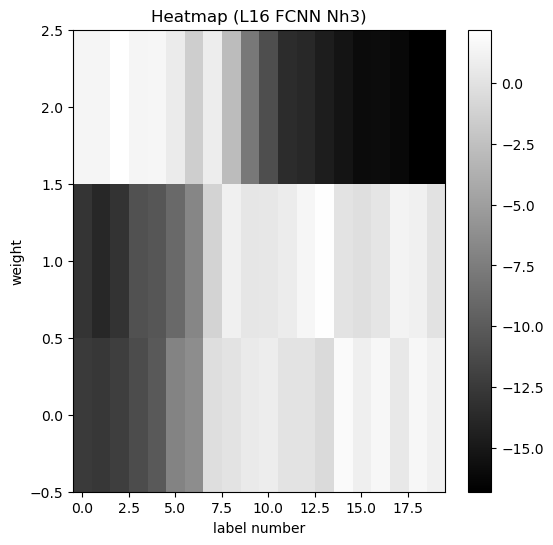

In [9]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_wight.png')
plt.show()

In [10]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-23.83928   , -25.14136   , -22.944405  , -20.394703  ,
       -19.030539  , -15.255428  , -14.529509  ,  -0.59513897,
        -1.596288  ,  -6.893065  ,  -9.816844  , -12.6685095 ,
       -12.292479  , -13.112477  , -13.473125  , -15.183365  ,
       -14.080952  , -14.35105   , -14.21683   , -15.742488  ],
      dtype=float32)

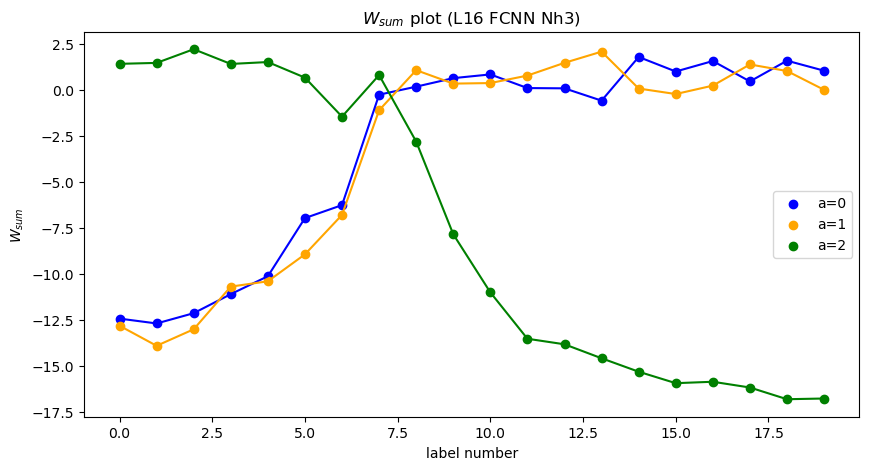

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [12]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [13]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [14]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16_v2.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [15]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [16]:
spin_data[0].shape

(16, 16)

In [17]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [18]:
fc1_weight = prm['fc1.weight'].numpy()
len(fc1_weight)

3

In [19]:
fc1_bias = prm['fc1.bias'].numpy()
fc1_bias

array([-2.521472 , -2.716608 ,  3.2077668], dtype=float32)

In [20]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [21]:
len(output_data_0)

40000

In [22]:
len(mag_data)

40000

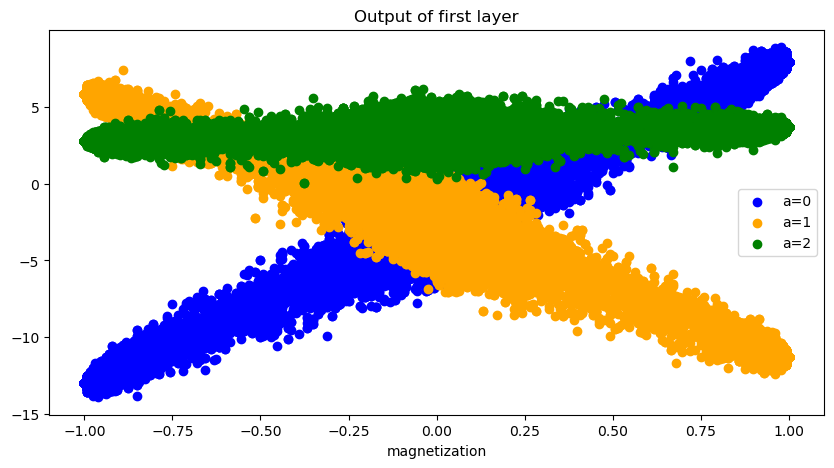

In [23]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()

学習済みモデルからプロットするver

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x

In [25]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [28]:
input_size = 16*16
hidden_size = 3
output_size = 20
model = FCNN2(input_size, hidden_size, output_size).to(device)

model.load_state_dict(torch.load(prm_data_path), strict=False)
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 1.2119e-02,  3.5719e-02,  4.0563e-03,  1.2020e-01, -2.7457e-02,
         -3.0364e-01,  2.2592e-02,  1.2475e-01,  8.8953e-02, -1.3229e-01,
          7.4583e-02,  1.2412e-01,  4.3140e-02,  4.9495e-02,  9.6837e-02,
          9.8910e-03, -1.0866e-01,  3.7378e-03, -2.9292e-02,  4.7113e-02,
          3.5467e-02,  8.2529e-02, -7.3852e-03, -1.7324e-02,  3.7718e-02,
          1.3111e-01,  1.6125e-01, -1.0256e-01,  4.0667e-02, -2.3409e-02,
          2.4113e-02, -2.3131e-02, -1.1397e-01,  1.2827e-01,  7.7946e-03,
          1.5101e-01,  8.6819e-02,  6.2193e-02,  1.8527e-01,  1.0845e-01,
         -3.2922e-02,  1.1330e-01,  1.2355e-01, -9.5817e-02,  6.4054e-02,
          4.9663e-02,  1.9846e-01,  4.6412e-02, -2.0122e-02,  5.6177e-02,
          9.5288e-03,  1.1928e-01,  1.0344e-01,  8.0059e-03, -1.3294e-02,
          1.1089e-01,  1.1367e-01, -1.1307e-01,  1.5226e-01,  1.3377e-01,
          5.6694e-03, -1.5349e-02,  3.6667e-02,  6.0936e-02,  9.4814e-02,
          

In [29]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [30]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [31]:
# NumPy ndarrayをPyTorch Tensorに変換
spin_data_tensor = [torch.from_numpy(i).type(torch.float32) for i in spin_data]
spin_data_tensor[0].size()

torch.Size([16, 16])

In [32]:
output = [np.squeeze(model(spin_data_tensor[i]).detach().numpy()) for i in range(len(spin_data_tensor))]

In [33]:
a = torch.squeeze(model(spin_data_tensor[1]))
b = [a[i].detach().numpy() for i in range(3)]
b[0]

array([-1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.], dtype=float32)

In [34]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]

In [36]:
fc0_weight = model.state_dict()['fc1.weight'].numpy()
fc0_bias = model.state_dict()['fc1.bias'].numpy()

In [43]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [44]:
output_data_0

[-0.8010475709743332,
 -2.116868654236896,
 -5.8901476527389605,
 -4.1511343343008775,
 -3.3032800329092424,
 -2.2085361785429996,
 -1.9391988644201774,
 -0.8563850386708509,
 -4.457673108699964,
 -3.081918521289481,
 -4.54346819219063,
 -0.44889921878348105,
 -3.940371780161513,
 -4.768755510711344,
 -0.421019679895835,
 -0.6861013853631448,
 -4.027489094325574,
 -2.248178729292704,
 -2.841751136846142,
 -0.02793991912039928,
 -3.8318302864499856,
 -0.19069283505086787,
 -2.4698610350314993,
 -5.693731553357793,
 -3.90268526764703,
 -1.6210253457247745,
 -1.6394338323443662,
 -2.4134268679481465,
 -3.579555624135537,
 -2.5294274094339926,
 -3.1315433970012236,
 -3.500303128239466,
 1.460929778899299,
 -1.3878284960228484,
 -4.675023231684463,
 -3.4138116319372784,
 -1.4217028324783314,
 -2.1542887732211966,
 -0.784215595544083,
 -6.298852668871405,
 -4.966970051667886,
 -2.1104264929599594,
 -1.9472114325326402,
 -2.2447850911703426,
 -4.773117087985156,
 -3.491617442079587,
 -3.89342

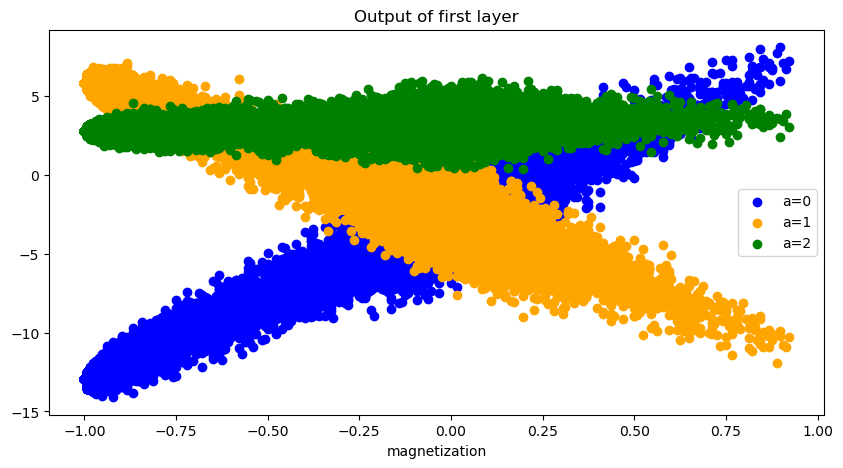

In [45]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_CNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()